##

# post GWAS analysis of sex-specific Analysis




In [1]:
from pathlib import Path
import pandas as pd
from scipy.stats import norm
import numpy as np
import gwaslab as gl

In [2]:
gl.show_version()

2025/01/13 10:54:27 GWASLab v3.5.4 https://cloufield.github.io/gwaslab/
2025/01/13 10:54:27 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com


In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 添加自定义字体路径

# check

# 打印 Matplotlib 可识别的字体名称
font_list = [f.name for f in fm.fontManager.ttflist]
if "Arial" in font_list:
    print("Arial font is available!")
else:
    print("Arial font is not found.")
    custom_font_path = "~/.fonts/Arial.ttf"  # 替换为你字体文件所在的目录
    fm.fontManager.addfont(custom_font_path)
    font_list = [f.name for f in fm.fontManager.ttflist]
    if "Arial" in font_list:
        print("Arial font is available now!")
    else:
        print("Arial font is still not found.")

Arial font is available!


In [4]:
import matplotlib.pyplot as plt
from pathlib import Path


def save_fig(
    fig=None,
    path=None,
    bbox_inches="tight",
    dpi=400,
    tiff=False,
    pdf=False,
    tiff_compress=False,
    **kwargs,
):
    if path is None:
        path = "temp"
    if fig is None or isinstance(fig, plt.Figure):
        fig = plt.gcf()
        Path(path).parent.mkdir(parents=True, exist_ok=True)

        fig.savefig(f"{path}.png", dpi=dpi, bbox_inches=bbox_inches, **kwargs)
        if pdf:
            fig.savefig(f"{path}.pdf", dpi=dpi, bbox_inches=bbox_inches, **kwargs)
        fig.savefig(f"{path}.svg", dpi=dpi, bbox_inches=bbox_inches, **kwargs)
        if tiff:
            fig.savefig(f"{path}.tiff", dpi=dpi, bbox_inches=bbox_inches, **kwargs)
        # plt.close(fig)


default_dpi = 400

## post-gwas


### 读取数据



In [67]:
rootDir = Path(
    "GWASResultV2/bloodAssayAndBasicCharacteristics/Format"
)
trait = "body_mass_index_bmi"
saveDir = Path("GWASResultV2/bloodAssayAndBasicCharacteristics/PostGWAS")/ trait
saveDir.mkdir(parents=True, exist_ok=True)


In [68]:
getTraitDir = lambda sex: rootDir / f"{trait}/{trait}_{sex}.feather"

In [69]:
%%time 
Female_mysumstats = gl.Sumstats(
    pd.read_feather(getTraitDir("female")),
    snpid="SNPID",
    chrom="CHROM",
    pos="GENPOS",
    ea="ALLELE1",
    nea="ALLELE0",
    eaf="A1FREQ",
    n="N",
    # p="P",
    mlog10p="LOG10P",
    beta="BETA",
    se="SE",
    build="38",
    rsID="ID"
)

Male_mysumstats = gl.Sumstats(
    pd.read_feather(getTraitDir("male")),
    snpid="SNPID",
    chrom="CHROM",
    pos="GENPOS",
    ea="ALLELE1",
    nea="ALLELE0",
    eaf="A1FREQ",
    n="N",
    # p="P",
    mlog10p="LOG10P",
    beta="BETA",
    se="SE",
    rsID = "ID",
    build="38",
)

2025/01/13 10:49:05 GWASLab v3.5.5 https://cloufield.github.io/gwaslab/
2025/01/13 10:49:05 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/01/13 10:49:05 Start to initialize gl.Sumstats from pandas DataFrame ...
2025/01/13 10:49:35  -Reading columns          : BETA,N,LOG10P,A1FREQ,GENPOS,CHROM,ALLELE1,SNPID,ALLELE0,SE
2025/01/13 10:49:35  -Renaming columns to      : BETA,N,MLOG10P,EAF,POS,CHR,EA,SNPID,NEA,SE
2025/01/13 10:49:35  -Current Dataframe shape : 16243919  x  10
2025/01/13 10:49:49  -Initiating a status column: STATUS ...
2025/01/13 10:49:49  -Genomic coordinates are based on GRCh38/hg38...
2025/01/13 10:49:57 Start to reorder the columns...v3.5.5
2025/01/13 10:49:57  -Current Dataframe shape : 16243919 x 11 ; Memory usage: 1186.43 MB
2025/01/13 10:49:57  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,MLOG10P,N,STATUS
2025/01/13 10:50:08 Finished reordering the columns.
2025/01/13 10:50:09  -Column  : SNPID  CHR   POS   EA       NE

KeyboardInterrupt: 

1. remove dump (目前可能存在恰好男女合并后是dump的，但是新版本已经去掉所有多等位基因了)

In [9]:
# optional, but should be done there or before
Female_mysumstats.remove_dup(mode="md")
Male_mysumstats.remove_dup(mode="md")

2025/01/12 20:25:38 Start to remove duplicated/multiallelic variants...v3.5.5
2025/01/12 20:25:38  -Current Dataframe shape : 16243919 x 11 ; Memory usage: 1186.43 MB
2025/01/12 20:25:38  -Removing mode:md
2025/01/12 20:25:38 ColumnP was not detected... skipping... 
2025/01/12 20:25:38 Start to remove duplicated variants based on snpid...v3.5.5
2025/01/12 20:25:38  -Current Dataframe shape : 16243919 x 11 ; Memory usage: 1186.43 MB
2025/01/12 20:25:38  -Which variant to keep:  first
2025/01/12 20:26:22  -Removed  0  based on SNPID...
2025/01/12 20:26:22 Start to remove duplicated variants based on CHR,POS,EA and NEA...
2025/01/12 20:26:22  -Current Dataframe shape : 16243919 x 11 ; Memory usage: 1310.36 MB
2025/01/12 20:26:22  -Which variant to keep:  first
2025/01/12 20:31:12  -Removed  0  based on CHR,POS,EA and NEA...
2025/01/12 20:31:12 Start to remove multiallelic variants based on chr:pos...
2025/01/12 20:31:12  -Current Dataframe shape : 16243919 x 11 ; Memory usage: 1310.36 MB


Assign P and MAF

In [10]:
%%time 
Female_mysumstats.data['P'] = 10**(- Female_mysumstats.data['MLOG10P'])
Male_mysumstats.data['P'] = 10**(- Male_mysumstats.data['MLOG10P'])

CPU times: user 1.27 s, sys: 10 ms, total: 1.28 s
Wall time: 2.67 s


In [11]:
Female_mysumstats.data["Z"] = (
    Female_mysumstats.data["BETA"] / Female_mysumstats.data["SE"]
)
Male_mysumstats.data["Z"] = Male_mysumstats.data["BETA"] / Male_mysumstats.data["SE"]

In [12]:
Female_mysumstats.data["MAF"] = Female_mysumstats.data["EAF"].apply(
    lambda x: min(x, 1 - x) if pd.notnull(x) else np.nan
)
Male_mysumstats.data["MAF"] = Male_mysumstats.data["EAF"].apply(
    lambda x: min(x, 1 - x) if pd.notnull(x) else np.nan
)

Cal lambda

暂时不用表格

In [13]:
from scipy import stats


def calculate_lambda_from_z(z_scores):
    chisq = z_scores**2
    median_chisq = np.median(chisq)
    lambda_gc = median_chisq / 0.4549364
    return lambda_gc


def calculate_lambda_from_p(p_values):
    z_scores = np.abs(stats.norm.ppf(p_values / 2))
    return calculate_lambda_from_z(z_scores)

In [14]:
Female_lambda = calculate_lambda_from_p(Female_mysumstats.data["P"])
Male_lambda = calculate_lambda_from_p(Male_mysumstats.data["P"])
print(
    f"Female genomic inflation factor is {Female_lambda:.2f}\nMale genomic inflation factor is {Male_lambda:.2f}"
)

Female genomic inflation factor is 1.17
Male genomic inflation factor is 1.14


In [65]:
genomic_control = pd.DataFrame(
    {
        "Trait": [trait],
        "Female_genomic_inflation_factor":[Female_lambda],
        "Male_genomic_inflation_factor":[Male_lambda]
    }
)
genomic_control

,Trait,Female_genomic_inflation_factor,Male_genomic_inflation_factor
0,body_mass_index_bmi,1.170676,1.140983


In [70]:
genomic_control.to_csv(saveDir / "genomic_control.csv", index=False)

### 绘制性别间的曼哈顿图

需要保存

In [61]:
# # check font 
# from matplotlib.font_manager import FontManager
# fm = FontManager()

# print(set(f.name for f in fm.ttflist))

In [79]:
Male_mysumstats.data.head()

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,MLOG10P,N,STATUS,P,Z,MAF,rsID
0,rs3094315,1,817186,A,G,0.840817,-0.002951,0.005289,0.238880,93265,3899999,0.576926,-0.557879,0.159183,rs3094315
1,rs3131972,1,817341,G,A,0.840717,-0.002631,0.005287,0.208529,93265,3899999,0.618687,-0.497713,0.159283,rs3131972
2,rs1048488,1,825532,T,C,0.840210,-0.002355,0.005258,0.184268,93265,3899999,0.654232,-0.447891,0.159790,rs1048488
3,rs3115850,1,825767,C,T,0.840343,-0.002543,0.005263,0.201436,93265,3899999,0.628875,-0.483312,0.159657,rs3115850
4,rs12562034,1,833068,A,G,0.105533,0.011392,0.006138,1.197480,93265,3899999,0.063463,1.855935,0.105533,rs12562034


2025/01/13 10:50:47 Start to create MQQ plot...v3.5.5:
2025/01/13 10:50:47  -Genomic coordinates version: 38...
2025/01/13 10:50:47  -Genome-wide significance level to plot is set to 5e-08 ...
2025/01/13 10:50:47  -Raw input contains 16243919 variants...
2025/01/13 10:50:47  -MQQ plot layout mode is : mqq


ValueError: Please make sure P column is in input sumstats.

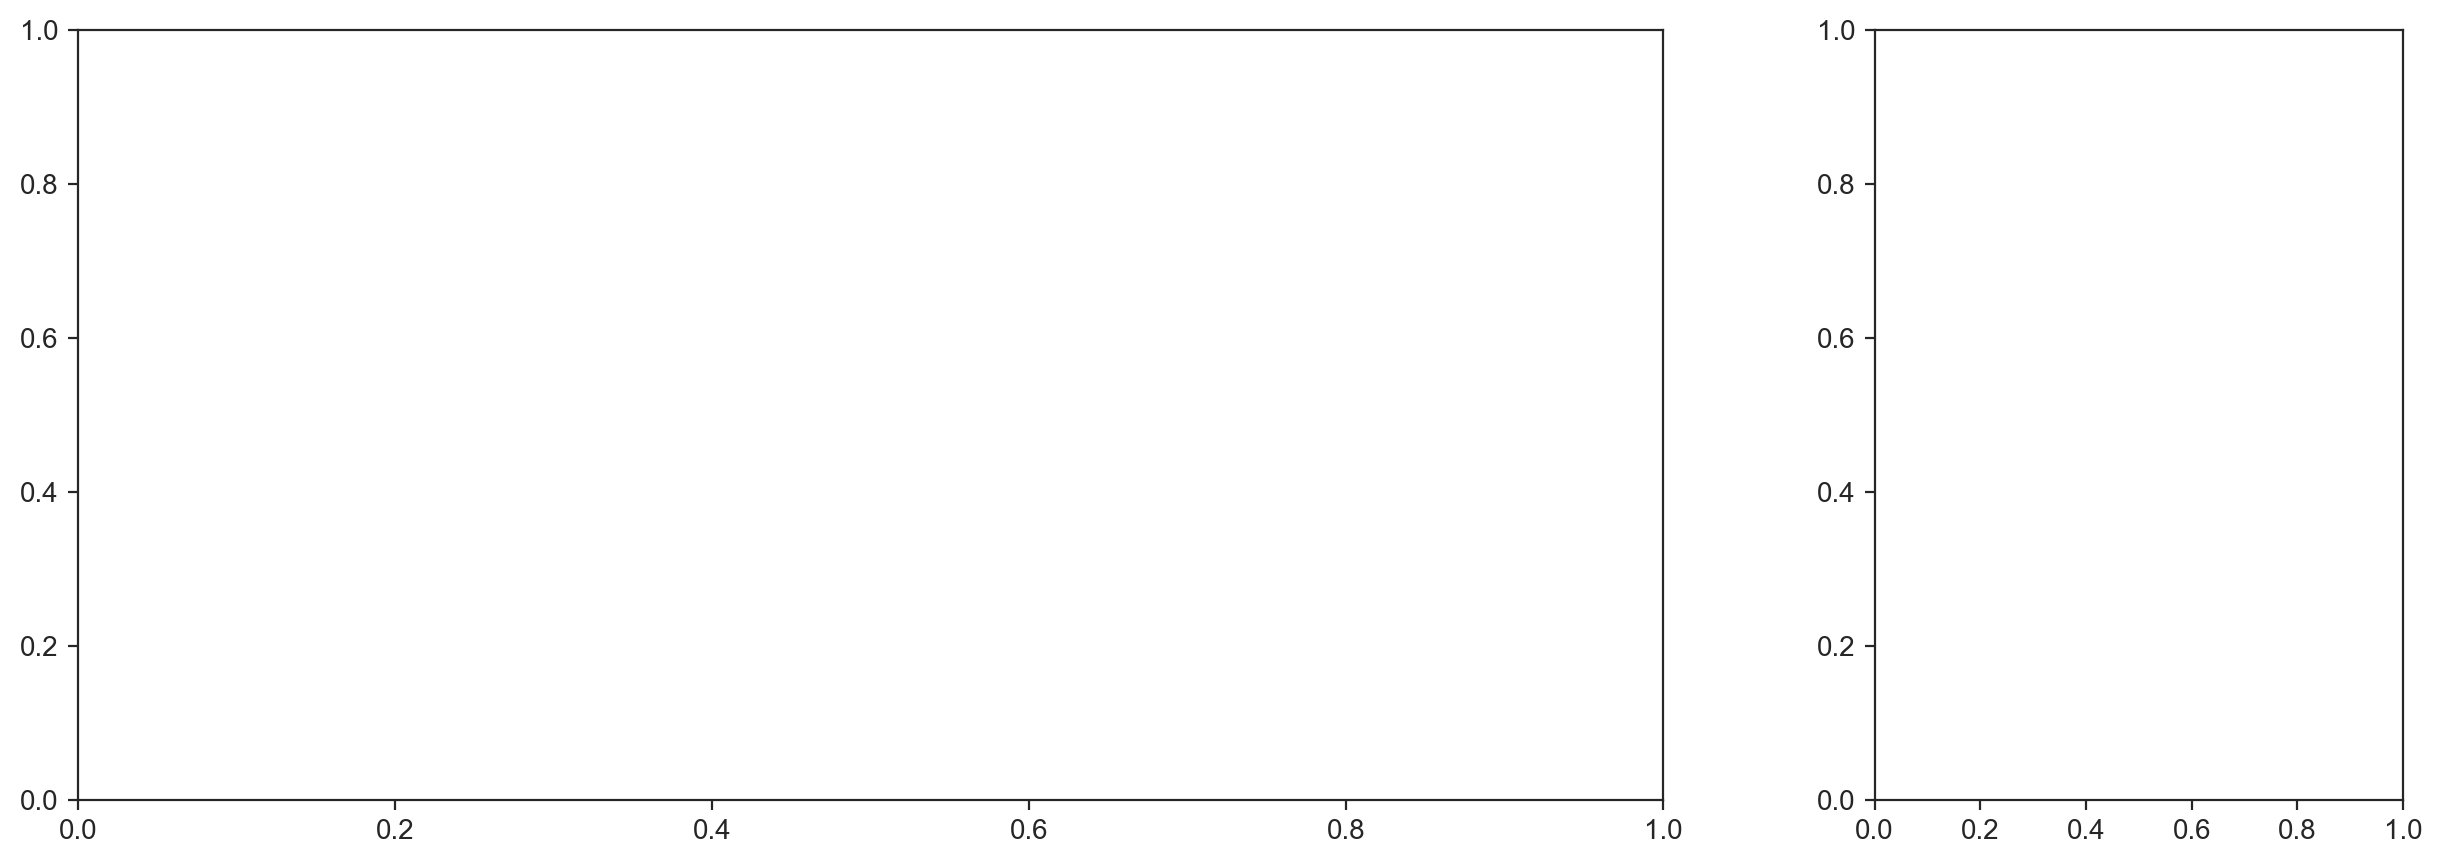

In [75]:
Female_mahanttanPlot = Female_mysumstats.plot_mqq(
    skip=2, title=f"{trait} Female", anno="GENENAME"
)
Male_mahanttanPlot = Male_mysumstats.plot_mqq(
    skip=2, title=f"{trait} Male", anno="GENENAME"
)

In [ ]:
save_fig

分性别的气泡图，展示性别差异之间是否存在相关差异

保存

In [16]:
sig_level = 5e-6
Female_mysumstats_lead_data = Female_mysumstats.get_lead(
    sig_level=sig_level, gls=True, anno=True
)
Male_mysumstats_lead_data = Male_mysumstats.get_lead(
    sig_level=sig_level, gls=True, anno=True
)

Female_sig_loci_numbers = Female_mysumstats_lead_data.data.shape[0]
Male_sig_loci_numbers = Male_mysumstats_lead_data.data.shape[0]
if Female_sig_loci_numbers == 0:
    print(f"Female {trait} no lead SNP")
else:
    print(
        f"Female {trait} found {Female_sig_loci_numbers} loci with windowsizekb=500 and sig_level={sig_level:.2e}"
    )
if Male_sig_loci_numbers == 0:
    print(f"Male {trait} no lead SNP")
else:
    print(
        f"Male {trait} found {Male_sig_loci_numbers} loci with windowsizekb=500 and sig_level={sig_level:.2e}"
    )

2025/01/12 20:54:59 Start to extract lead variants...v3.5.5
2025/01/12 20:54:59  -Current Dataframe shape : 16241131 x 14 ; Memory usage: 1573.45 MB
2025/01/12 20:54:59  -Processing 16241131 variants...
2025/01/12 20:54:59  -Significance threshold : 5e-06
2025/01/12 20:54:59  -Sliding window size: 500  kb
2025/01/12 20:57:05  -Using MLOG10P for extracting lead variants...
2025/01/12 20:57:05  -Found 11412 significant variants in total...
2025/01/12 20:57:11  -Identified 253 lead variants!
2025/01/12 20:57:11  -Annotating variants using references:ensembl
2025/01/12 20:57:11  -Annotating variants using references based on genome build:38
2025/01/12 20:57:11 Start to annotate variants with nearest gene name(s)...
2025/01/12 20:57:11  -Assigning Gene name using ensembl_hg38_gtf for protein coding genes
2025/01/12 21:00:13 Finished annotating variants with nearest gene name(s) successfully!
2025/01/12 21:00:13 Finished extracting lead variants.
2025/01/12 21:01:16 Start to extract lead var

2025/01/12 21:04:27 Start to create trumpet plot...
2025/01/12 21:04:27  -Prevalence is not given. Estimating based on scase and scontrol :0.19093260465989445...
2025/01/12 21:04:27  -Settings:
2025/01/12 21:04:27   -Mode: b
2025/01/12 21:04:27   -N_CASE: 36614
2025/01/12 21:04:27   -N_CONTROL: 155150
2025/01/12 21:04:27   -PREVALENCE: 0.19093260465989445
2025/01/12 21:04:27   -BETA: BETA
2025/01/12 21:04:27   -Significance level: 5e-08
2025/01/12 21:04:27   -Power thresholds: [0.8]
2025/01/12 21:04:27   -Power line smoothness: 2000
2025/01/12 21:04:27  -Excluding variants with P values > 5e-08
2025/01/12 21:04:27  -Plotting 50 variants...
2025/01/12 21:04:27  -Flipping 12 variants...
2025/01/12 21:04:27  -Updating eaf-beta matrix...
2025/01/12 21:04:27  -OR is converted to GRR using base prevalence: 0.19093260465989445
2025/01/12 21:04:32  -Extracting eaf-beta combinations with power = 0.8...
2025/01/12 21:04:32  -Creating scatter plot...
2025/01/12 21:04:32  -Finished screating scatt

2025/01/12 21:04:32 Finished annotating variants with nearest gene name(s) successfully!
2025/01/12 21:04:32 Start to save figure...
2025/01/12 21:04:32  -Skip saving figure!
2025/01/12 21:04:32 Finished saving figure...
2025/01/12 21:04:32 Finished creating trumpet plot!


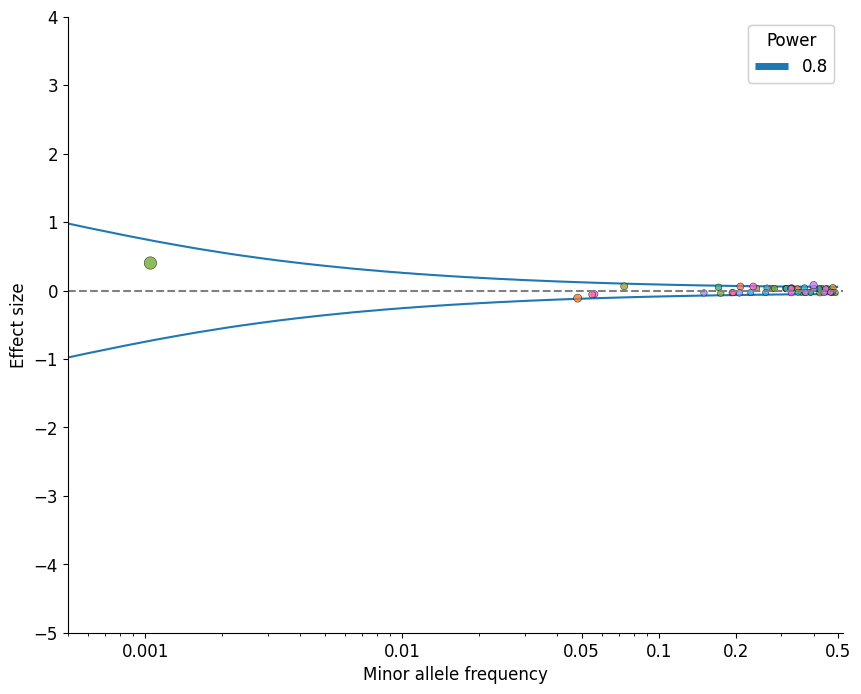

In [17]:
Female_mysumstats_lead_data_trumpetPlot = Female_mysumstats_lead_data.plot_trumpet(
    mode="b",
    ncase=36614,
    # ncase=n_case,
    # ncontrol=n_control,
    ncontrol=155150,
    # sig_level=5e-6,
    # p_level=5e-6,
    ts=[0.8],
    anno="GENENAME",
    anno_style="expand",
    cmap="tab20",
    or_to_rr=True,
    build="38",
    anno_x=0.01,
    anno_y=0,
    n_matrix=2000,
    fontsize=12,
    xscale="log",
    repel_force=0.15,
    sort="eaf",
    hue="GENE",
    ylim=(-5, 4),
    # title="Female",
)

2025/01/12 21:04:34 Start to create trumpet plot...
2025/01/12 21:04:34  -Prevalence is not given. Estimating based on scase and scontrol :0.19093260465989445...
2025/01/12 21:04:34  -Settings:
2025/01/12 21:04:34   -Mode: b
2025/01/12 21:04:34   -N_CASE: 36614
2025/01/12 21:04:34   -N_CONTROL: 155150
2025/01/12 21:04:34   -PREVALENCE: 0.19093260465989445
2025/01/12 21:04:34   -BETA: BETA
2025/01/12 21:04:34   -Significance level: 5e-08
2025/01/12 21:04:34   -Power thresholds: [0.8]
2025/01/12 21:04:34   -Power line smoothness: 2000
2025/01/12 21:04:34  -Excluding variants with P values > 5e-08
2025/01/12 21:04:34  -Plotting 51 variants...
2025/01/12 21:04:34  -Flipping 17 variants...
2025/01/12 21:04:34  -Updating eaf-beta matrix...
2025/01/12 21:04:34  -OR is converted to GRR using base prevalence: 0.19093260465989445
2025/01/12 21:04:37  -Extracting eaf-beta combinations with power = 0.8...
2025/01/12 21:04:37  -Creating scatter plot...
2025/01/12 21:04:37  -Finished screating scatt

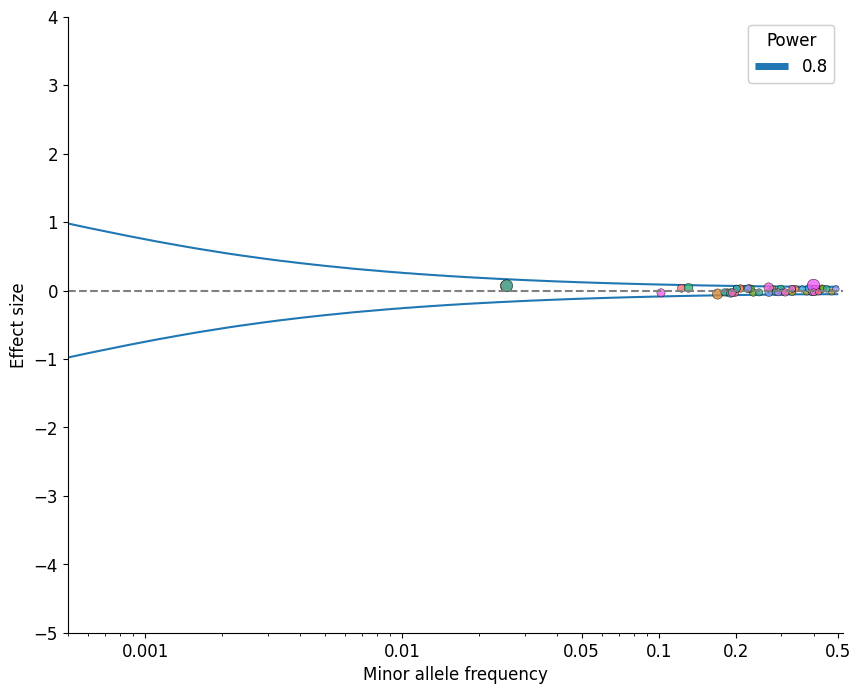

In [18]:
Male_mysumstats_lead_data_trumpetPlot = Male_mysumstats_lead_data.plot_trumpet(
    mode="b",
    ncase=36614,
    # ncase=n_case,
    # ncontrol=n_control,
    ncontrol=155150,
    # sig_level=5e-6,
    # p_level=5e-8,
    ts=[0.8],
    # ts=[0.2, 0.4, 0.6, 0.8],
    anno="GENENAME",
    anno_style="right",
    cmap="tab20",
    or_to_rr=True,
    build="38",
    anno_x=0.01,
    anno_y=0,
    n_matrix=2000,
    fontsize=12,
    xscale="log",
    repel_force=0.15,
    sort="eaf",
    hue="GENE",
    ylim=(-5, 4),
    # title="Male",
)

### 绘制性别对比的曼哈顿图

保存

2025/01/12 21:04:38 Start to create miami plot v3.5.5:
2025/01/12 21:04:38  -Obtaining Sumstats1 CHR, POS, P and annotation from: ['CHR', 'POS', 'P']
2025/01/12 21:04:38  -Loading Sumstats1 from gwaslab.Sumstats Object
2025/01/12 21:04:39  -Obtaining Sumstats2 CHR, POS, P and annotation from: ['CHR', 'POS', 'P']
2025/01/12 21:04:39  -Loading Sumstats2 from gwaslab.Sumstats Object
2025/01/12 21:04:44  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/01/12 21:04:46  -Sumstats P values are being converted to -log10(P)...
2025/01/12 21:04:51  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/01/12 21:04:57  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/01/12 21:04:58  -Sumstats P values are being converted to -log10(P)...
2025/01/12 21:05:01  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/01/12 21:05:06  -Merging sumstats using chr and pos...
2025/01/12 21:06:51  -C

2025/01/12 21:08:37 Finished creating miami plot successfully


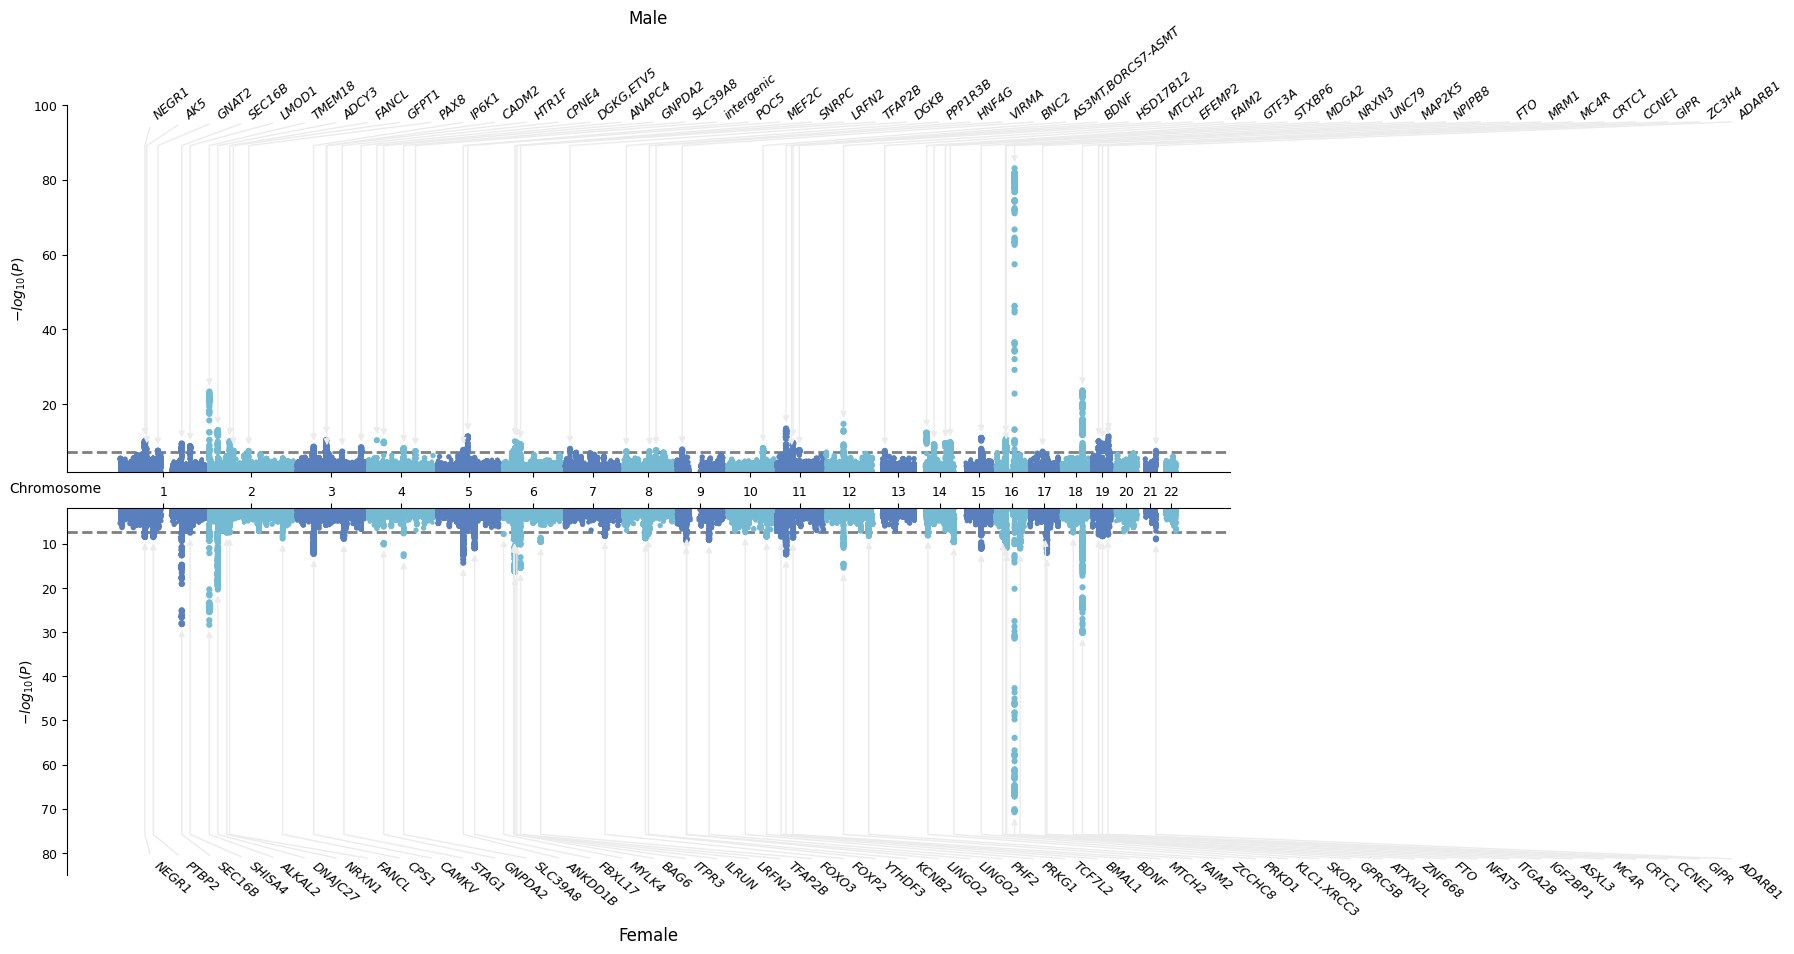

In [19]:
Female_Male_miamiPlot = gl.plot_miami2(
    path1=Male_mysumstats,
    path2=Female_mysumstats,
    skip=2,
    #  id1="SNPID",
    #  id2="SNPID",
    anno1="GENENAME",
    anno2="GENENAME",
    build="38",
    titles=[
        "Male",
        "Female",
    ],
)

### 计算异质性

见2021NG

![](https://tf-picture-bed-1259792641.cos.ap-beijing.myqcloud.com/20250107154222.png)

In [20]:
# cal spearman correlation

innerSet = Female_mysumstats.data.merge(
    Male_mysumstats.data,
    on=["SNPID", "CHR", "POS", "EA", "NEA"],
    suffixes=["_female", "_male"],
)

save this results to a file


In [21]:
# spearman rank correlation
# save this results to a file

from scipy.stats import spearmanr

r, p = spearmanr(innerSet["P_male"], innerSet["P_female"])
print(f"Spearman rank correlation cross sex is {r:.4f}, p-value is {p:.4e}")

Spearman rank correlation cross sex is 0.0420, p-value is 0.0000e+00


In [22]:
# innerSet["New_P_male"] = 2 * norm.sf(
#     np.abs(innerSet["BETA_male"] / innerSet["SE_male"])
# )  # two-sided

# innerSet[["P_male", "New_P_male"]]

In [23]:
# hetrogeneity test


def het_test(BETA_F, SE_F, BETA_M, SE_M, P_F=None, P_M=None, r=None):
    """
    Follow the formula in the paper of (Bernabeu et al., Nat Genet, 2021)

    BETA_F: np.array or pd.Series,
    SE_F: np.array or pd.Series,
    BETA_M: np.array or pd.Series,
    SE_M: np.array or pd.Series,
    r: float, default None, the spearman correlation between the Female and Male of p-values (zscore is same as p-value)
    """

    if r is None:
        # r, _ = spearmanr(BETA_F, BETA_M)
        if P_F is None:
            P_F = 2 * norm.sf(np.abs(BETA_F / SE_F))
        if P_M is None:
            P_M = 2 * norm.sf(np.abs(BETA_M / SE_M))

        r, p_spearmanr = spearmanr(P_F, P_M)

        print(
            f"The spearman correlation of Z-scores is {r:.6f}, p-value is {p_spearmanr:.4e}"
        )
    # calculate the two-tailed t-test
    t = (BETA_M - BETA_F) / np.sqrt(SE_M**2 + SE_F**2 - 2 * r * SE_M * SE_F)

    # pvalue
    p = 2 * norm.sf(np.abs(t))

    return p

计算Het P

In [24]:
innerSet["het_p"] = het_test(
    BETA_F=innerSet["BETA_female"],
    SE_F=innerSet["SE_female"],
    BETA_M=innerSet["BETA_male"],
    SE_M=innerSet["SE_male"],
)
innerSet

The spearman correlation of Z-scores is 0.041982, p-value is 0.0000e+00


,SNPID,CHR,POS,EA,NEA,EAF_female,BETA_female,SE_female,MLOG10P_female,N_female,...,EAF_male,BETA_male,SE_male,MLOG10P_male,N_male,STATUS_male,P_male,Z_male,MAF_male,het_p
0,rs562993331,1,13259,A,G,0.000267,0.057405,0.141978,0.163692,110410,...,0.000239,-0.025281,0.133270,0.070813,93265,3899999,0.849547,-0.189697,0.000239,0.664426
1,rs578081284,1,17641,A,G,0.000863,0.059460,0.078269,0.349268,110410,...,0.000844,-0.010329,0.070159,0.054059,93265,3899999,0.882960,-0.147218,0.000844,0.497607
2,rs576081345,1,57222,C,T,0.000629,-0.015941,0.092995,0.063540,110410,...,0.000705,0.049350,0.076853,0.283340,93265,3899999,0.520787,0.642133,0.000705,0.580461
3,rs570371753,1,58396,C,T,0.000248,-0.083966,0.136611,0.268575,110410,...,0.000210,0.153983,0.130756,0.621709,93265,3899999,0.238941,1.177636,0.000210,0.198599
4,rs2531267,1,69569,C,T,0.000214,-0.053394,0.151390,0.140071,110410,...,0.000196,0.063858,0.142157,0.184900,93265,3899999,0.653281,0.449210,0.000196,0.564061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801866,22:51227822_CCTCT_C,22,50789394,C,CCTCT,0.001823,0.039107,0.056116,0.313479,110410,...,0.001721,0.004518,0.052034,0.031139,93265,3899999,0.930810,0.086826,0.001721,0.644266
15801867,rs531249897,22,50790203,A,C,0.001823,0.039107,0.056116,0.313479,110410,...,0.001721,0.004518,0.052034,0.031139,93265,3899999,0.930810,0.086826,0.001721,0.644266
15801868,rs9616985,22,50791377,C,T,0.072655,0.011785,0.008217,0.819597,110410,...,0.072750,-0.001937,0.007273,0.102390,93265,3899999,0.789969,-0.266350,0.072750,0.201461
15801869,rs367819077,22,50791711,G,T,0.000487,-0.018858,0.101906,0.068955,110410,...,0.000496,-0.008303,0.089777,0.033243,93265,3899999,0.926311,-0.092487,0.000496,0.936726


SexDiff_sumstats 需要保存，并且提供方向（和XY讨论）

In [25]:
SexDiff_sumstats = gl.Sumstats(
    innerSet,
    snpid="SNPID",
    chrom="CHR",
    pos="POS",
    ea="EA",
    nea="NEA",
    p="het_p",
    build="38",
)

2025/01/12 21:15:51 GWASLab v3.5.5 https://cloufield.github.io/gwaslab/
2025/01/12 21:15:51 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/01/12 21:15:51 Start to initialize gl.Sumstats from pandas DataFrame ...
2025/01/12 21:16:31  -Reading columns          : het_p,EA,CHR,POS,SNPID,NEA
2025/01/12 21:16:31  -Renaming columns to      : P,EA,CHR,POS,SNPID,NEA
2025/01/12 21:16:31  -Current Dataframe shape : 15801871  x  6
2025/01/12 21:16:36  -Initiating a status column: STATUS ...
2025/01/12 21:16:36  -Genomic coordinates are based on GRCh38/hg38...
2025/01/12 21:16:50 Start to reorder the columns...v3.5.5
2025/01/12 21:16:50  -Current Dataframe shape : 15801871 x 7 ; Memory usage: 687.63 MB
2025/01/12 21:16:50  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,P,STATUS
2025/01/12 21:16:52 Finished reordering the columns.
2025/01/12 21:16:53  -Column  : SNPID  CHR   POS   EA       NEA      P       STATUS  
2025/01/12 21:16:53  -DType   : object Int64 Int64 

需要保存

2025/01/12 21:16:54 Start to create MQQ plot...v3.5.5:
2025/01/12 21:16:54  -Genomic coordinates version: 38...
2025/01/12 21:16:54  -Genome-wide significance level to plot is set to 5e-08 ...
2025/01/12 21:16:54  -Raw input contains 15801871 variants...
2025/01/12 21:16:54  -MQQ plot layout mode is : mqq
2025/01/12 21:16:59 Finished loading specified columns from the sumstats.
2025/01/12 21:16:59 Start data conversion and sanity check:
2025/01/12 21:17:01  -Removed 0 variants with nan in CHR or POS column ...
2025/01/12 21:17:10  -Removed 0 variants with CHR <=0...
2025/01/12 21:17:15  -Removed 0 variants with nan in P column ...
2025/01/12 21:17:21  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/01/12 21:17:23  -Sumstats P values are being converted to -log10(P)...
2025/01/12 21:17:26  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/01/12 21:17:46  -Converting data above cut line...
2025/01/12 21:17:46  -Maximum -log10(P

2025/01/12 21:17:53 Finished creating plot successfully!


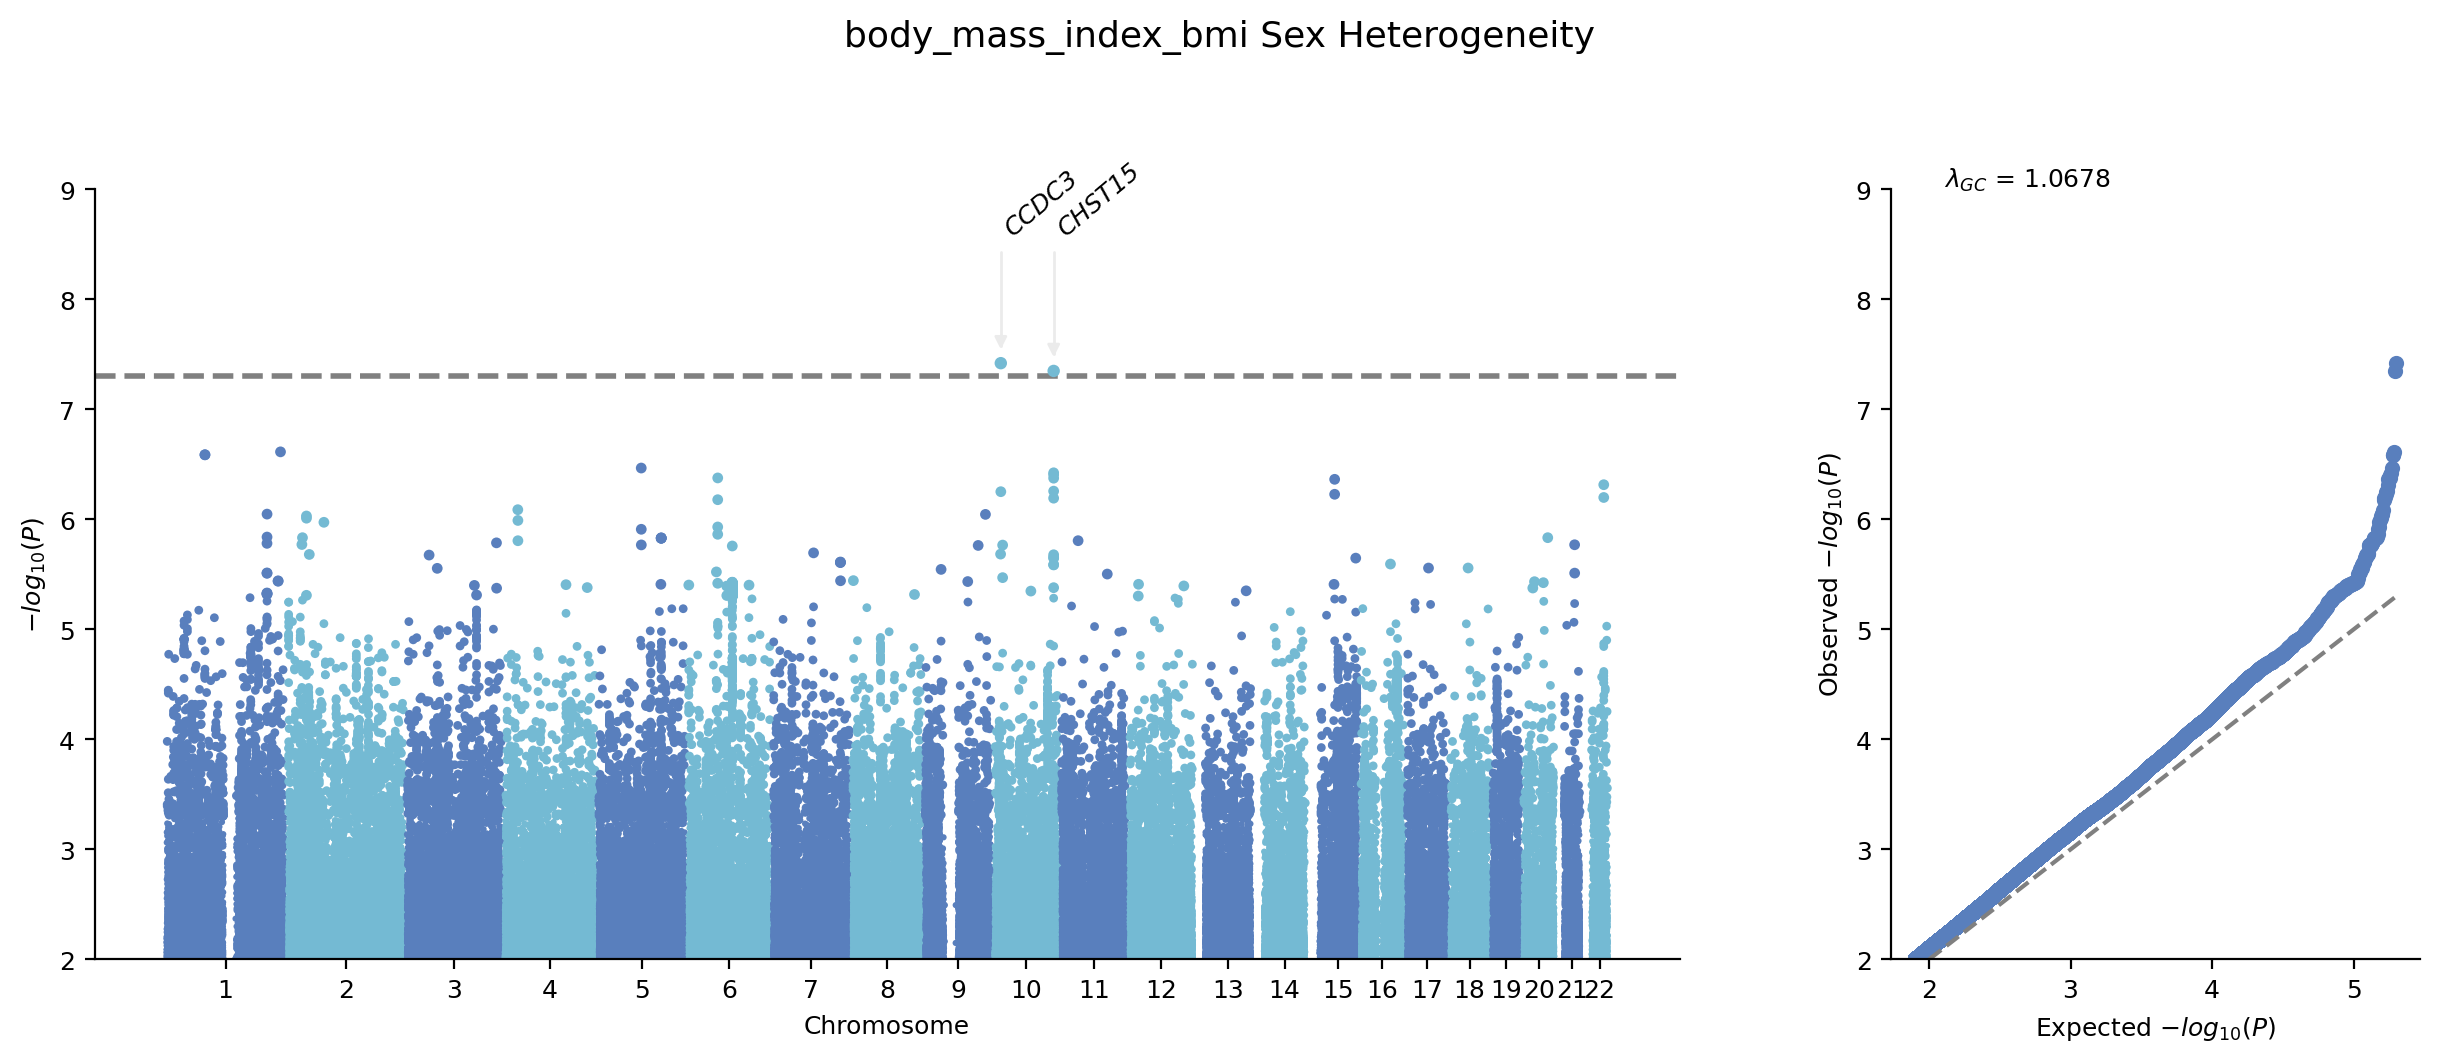

In [26]:
SexDiff_mahanttanPlot = SexDiff_sumstats.plot_mqq(
    skip=2, title=f"{trait} Sex Heterogeneity", anno="GENENAME"
)

Genome-wide significance cut-off is $P \lt 1 \times 10^{-8}$

保存显著的位点以及对应的表型

In [27]:
SigLoci = SexDiff_sumstats.get_lead(sig_level=1e-8)

if SigLoci.shape[0] == 0:
    print(f"No significant loci found of {trait}")

2025/01/12 21:18:09 Start to extract lead variants...v3.5.5
2025/01/12 21:18:09  -Current Dataframe shape : 15801871 x 7 ; Memory usage: 687.63 MB
2025/01/12 21:18:09  -Processing 15801871 variants...
2025/01/12 21:18:09  -Significance threshold : 1e-08
2025/01/12 21:18:09  -Sliding window size: 500  kb
2025/01/12 21:18:17  -Using P for extracting lead variants...
2025/01/12 21:18:17  -Found 0 significant variants in total...
2025/01/12 21:18:18  -Identified 0 lead variants!
2025/01/12 21:18:18 Finished extracting lead variants.
No significant loci found of body_mass_index_bmi


#### compare het
TODO：这张图有待进一步理解

保存

2025/01/12 21:18:19 Start to process the raw sumstats for plotting...
2025/01/12 21:18:19 Path1 is gwaslab Sumstats object...
2025/01/12 21:18:19 Path2 is gwaslab Sumstats object...
2025/01/12 21:18:19  -Loading sumstats for Male : SNPID
2025/01/12 21:18:30  -Loading sumstats for Female : SNPID,P,CHR,POS
2025/01/12 21:19:02  -Counting  variants available for both datasets: 15801871  variants...
2025/01/12 21:20:39  -Using only variants available for both datasets...
2025/01/12 21:20:39  -Extract lead variants from Female...
2025/01/12 21:20:39 Start to extract lead variants...v3.5.5
2025/01/12 21:20:39  -Current Dataframe shape : 15801871 x 4 ; Memory usage: 632.93 MB
2025/01/12 21:20:39  -Processing 15801871 variants...
2025/01/12 21:20:39  -Significance threshold : 5e-08
2025/01/12 21:20:39  -Sliding window size: 500  kb
2025/01/12 21:20:46  -Using P for extracting lead variants...
2025/01/12 21:20:46  -Found 4115 significant variants in total...
2025/01/12 21:20:47  -Identified 51 l

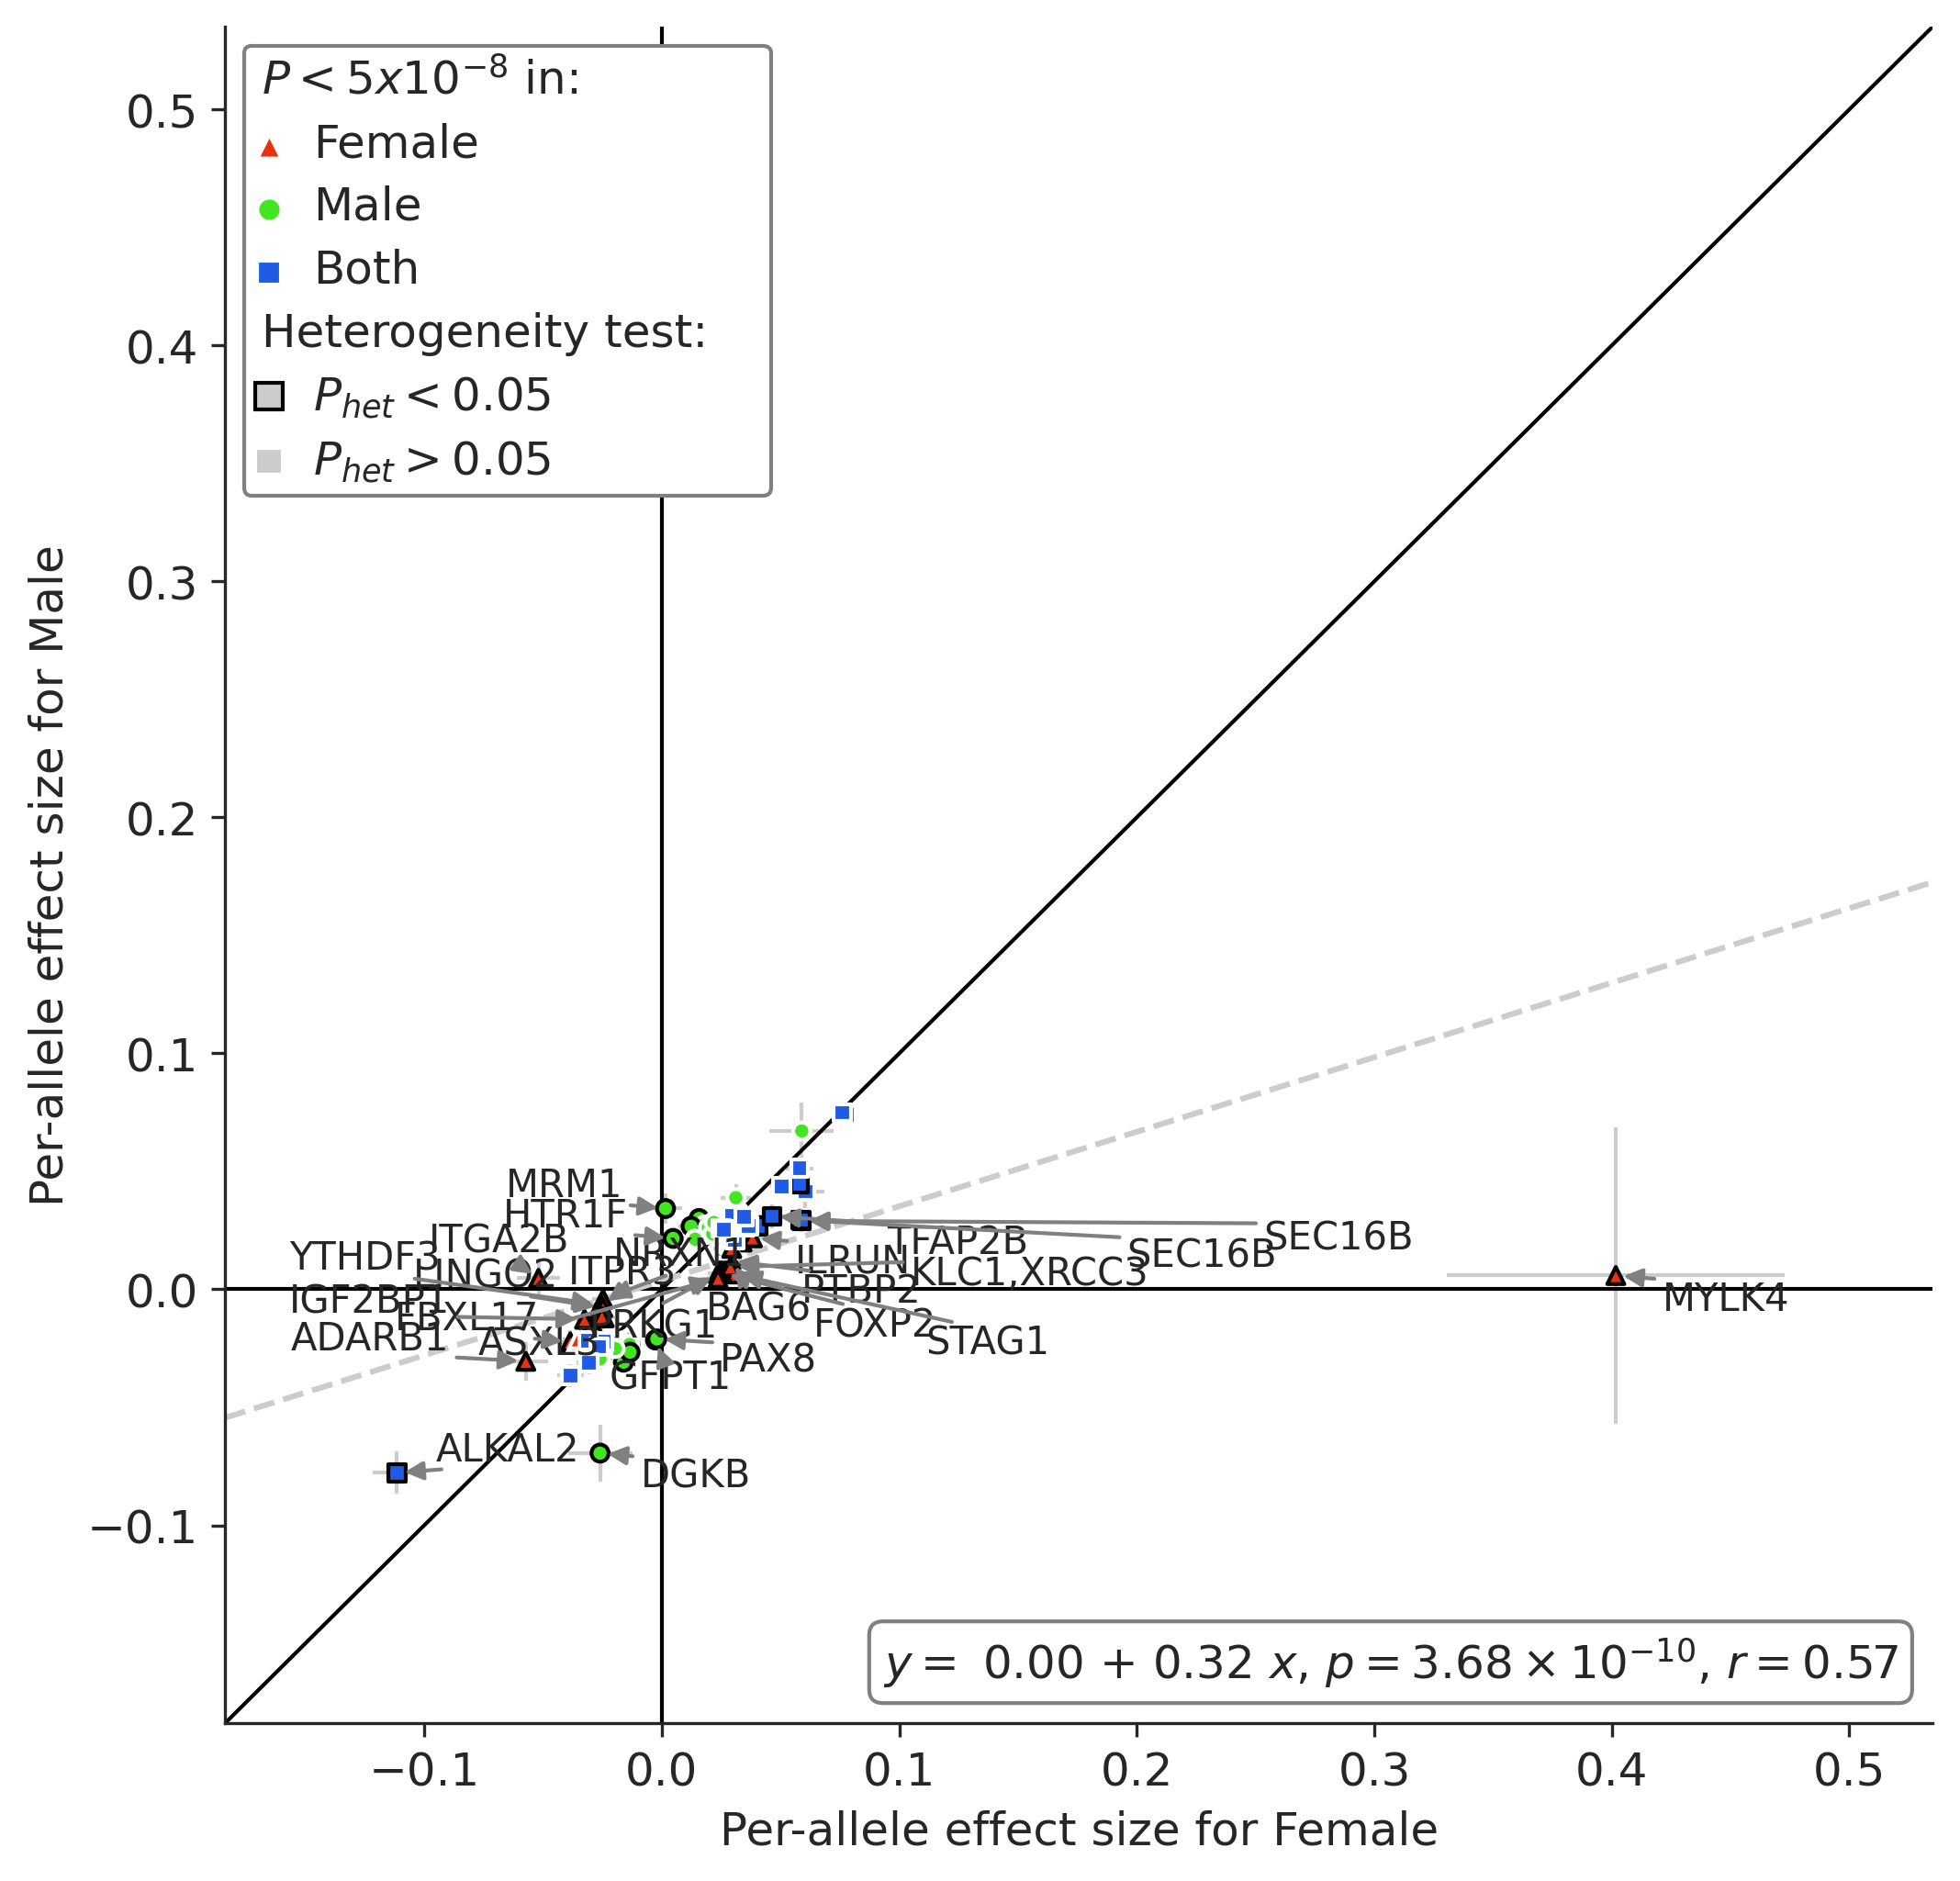

In [28]:
female_male_comparePlot = gl.compare_effect(
    path1=Female_mysumstats,
    cols_name_list_1=["SNPID", "P", "NEA", "EA", "CHR", "POS"],
    effect_cols_list_1=["BETA", "SE"],
    path2=Male_mysumstats,
    cols_name_list_2=["SNPID", "P", "NEA", "EA", "CHR", "POS"],
    effect_cols_list_2=["BETA", "SE"],
    label=["Female", "Male", "Both", "None"],
    xylabel_prefix="Per-allele effect size for ",
    anno="GENENAME",
    anno_het=True,
    anno_diff=0.015,
    is_q=True,
    sig_level=5e-8,
    legend_title=r"$ P < 5 x 10^{-8}$ in:",
    verbose=True,
    build="38",
    # mode="OR",
    #   save = "myplot.png",
    #   save_args= {"dpi":300,"facecolor":"white"}
)

### 计算性别间的遗传力和遗传相关性

1. SNP 位点需要hapmap3 
1. 需要预先计算好的LDSC，EUR的即可，来源见XXX（补充）；



In [45]:
# ref_ld_chr = "/pmaster/xutingfeng/dataset/LD_reference/LDSC/eur_w_ld_chr/"
ref_ld_chr = "/pmaster/xutingfeng/dataset/ukb/dataset/LD_reference/LDSC/eur_w_ld_chr/"
w_ld_chr = ref_ld_chr

In [39]:
# keep only hapmap3 SNPs

Female_mysumstats.filter_hapmap3(inplace=True)
Male_mysumstats.filter_hapmap3(inplace=True)

2025/01/12 23:57:28 Start to extract HapMap3 SNPs...v3.5.5
2025/01/12 23:57:28  -Current Dataframe shape : 896560 x 15 ; Memory usage: 123.76 MB
2025/01/12 23:57:28  -Loading Hapmap3 variants from built-in datasets...
2025/01/12 23:57:31  -rsID will be used for matching...


KeyboardInterrupt: 

In [42]:
# Female_mysumstats.data

#### 估计性别间的遗传力

In [46]:
Female_mysumstats.estimate_h2_by_ldsc(ref_ld_chr=ref_ld_chr, w_ld_chr=w_ld_chr)
Male_mysumstats.estimate_h2_by_ldsc(ref_ld_chr=ref_ld_chr, w_ld_chr=w_ld_chr)

2025/01/12 23:59:33 Start to extract HapMap3 SNPs...v3.5.5
2025/01/12 23:59:33  -Current Dataframe shape : 896560 x 15 ; Memory usage: 123.76 MB
2025/01/12 23:59:33  -Loading Hapmap3 variants from built-in datasets...
2025/01/12 23:59:35  -rsID will be used for matching...
2025/01/12 23:59:37  -Raw input contains 896560 Hapmap3 variants based on rsID...
2025/01/12 23:59:37 Start to run LD score regression...v3.5.5
2025/01/12 23:59:37  -Current Dataframe shape : 896560 x 15 ; Memory usage: 123.76 MB
2025/01/12 23:59:37  -Run single variate LD score regression:
2025/01/12 23:59:37   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/01/12 23:59:37   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Distinguishes Confounding from Polygenicity in Genome-Wide Association Studies. Nature Genetics, 2015.
2025/01/12 23:59:37  -Arguments:
2025/01/12 23:59:37   -ref_ld_chr:/pmaster/xutingfeng/dataset/ukb/dataset/LD_reference/LDSC/eur_w_ld_chr/
2025/01/12 23:59:37   -w

整理结果

In [47]:
h2_df = pd.concat(
    [
        Male_mysumstats.ldsc_h2.assign(Trait=trait, Group="Male").drop(
            columns=["Catagories"]
        ),
        Female_mysumstats.ldsc_h2.assign(Trait=trait, Group="Female").drop(
            columns=["Catagories"]
        ),
    ]
)
# format the dataframe
h2_df = h2_df.pivot(index="Trait", columns="Group")
# flatten the column
h2_df.columns = h2_df.columns.to_flat_index()
h2_df.columns = ["_".join(col).strip() for col in h2_df.columns.values]
# reset index
h2_df = h2_df.reset_index()
# set dtype
# h2_df.iloc[:, 1:] = h2_df.iloc[:, 1:].astype(float)
for col in h2_df.columns[1:]:
    h2_df[col] = h2_df[col].astype(float)
h2_df

,Trait,h2_obs_Female,h2_obs_Male,h2_se_Female,h2_se_Male,Lambda_gc_Female,Lambda_gc_Male,Mean_chi2_Female,Mean_chi2_Male,Intercept_Female,Intercept_Male,Intercept_se_Female,Intercept_se_Male,Ratio_Female,Ratio_Male,Ratio_se_Female,Ratio_se_Male
0,body_mass_index_bmi,0.271525,0.276924,0.011577,0.012615,1.480155,1.416799,1.643641,1.555544,1.024319,1.024131,0.011361,0.011233,0.037784,0.043437,0.01765,0.02022


计算性别间遗传力是否存在差异，参考

![](https://tf-picture-bed-1259792641.cos.ap-beijing.myqcloud.com/20250107183843.png)

保存h2_df

In [48]:
# set the heterogeneity test; note this is a two-tailed test with largely sample size, so think it is normal distribution 
h2_df["het_p"] = het_test(
    BETA_F=h2_df["h2_obs_Female"],
    SE_F=h2_df["h2_se_Female"],
    BETA_M=h2_df["h2_obs_Male"],
    SE_M=h2_df["h2_se_Male"],
    r=0,
)
h2_df

,Trait,h2_obs_Female,h2_obs_Male,h2_se_Female,h2_se_Male,Lambda_gc_Female,Lambda_gc_Male,Mean_chi2_Female,Mean_chi2_Male,Intercept_Female,Intercept_Male,Intercept_se_Female,Intercept_se_Male,Ratio_Female,Ratio_Male,Ratio_se_Female,Ratio_se_Male,het_p
0,body_mass_index_bmi,0.271525,0.276924,0.011577,0.012615,1.480155,1.416799,1.643641,1.555544,1.024319,1.024131,0.011361,0.011233,0.037784,0.043437,0.01765,0.02022,0.752529


#### 计算遗传相关性

In [49]:
Female_mysumstats.estimate_rg_by_ldsc(
    other_traits=[Male_mysumstats],
    rg="Female,Male",
    ref_ld_chr=ref_ld_chr,
    w_ld_chr=w_ld_chr,
)

2025/01/13 00:00:11 Start to extract HapMap3 SNPs...v3.5.5
2025/01/13 00:00:11  -Current Dataframe shape : 896560 x 15 ; Memory usage: 123.76 MB
2025/01/13 00:00:11  -Loading Hapmap3 variants from built-in datasets...
2025/01/13 00:00:13  -rsID will be used for matching...
2025/01/13 00:00:14  -Raw input contains 896560 Hapmap3 variants based on rsID...
2025/01/13 00:00:14 Start to run LD score regression for genetic correlation...v3.5.5
2025/01/13 00:00:14  -Current Dataframe shape : 896560 x 15 ; Memory usage: 123.76 MB
2025/01/13 00:00:14  -Run cross-trait LD score regression:
2025/01/13 00:00:14   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/01/13 00:00:14   -Please cite LDSC: Bulik-Sullivan, B., et al. An Atlas of Genetic Correlations across Human Diseases and Traits. Nature Genetics, 2015.
2025/01/13 00:00:14  -Arguments:
2025/01/13 00:00:14   -rg:Female,Male
2025/01/13 00:00:14   -ref_ld_chr:/pmaster/xutingfeng/dataset/ukb/dataset/LD_reference/LDSC/eur_w_ld

The last section (which may not fit too well on your screen) is a table summarizing all results. This feature is a little silly when computing a single genetic correlation, but is a big time-saver when running --rg with more than two traits. The columns are p1 = trait 1, p2 = trait 2, rg = genetic correlation, se = standard error of rg, p = p-value for rg; h2_obs, h2_obs_se = observed scale h2 for trait 2 and standard error, h2_int, h2_int_se = single-trait LD Score regression intercept for trait 2 and standard error, gcov_int, gcov_int_se = cross-trait LD Score regression intercept and standard error.


>p and z is pvalue for rg 
> while there we do is rg diff from 1, so $t = \frac{r_g-1}{s.e._{rg}}$

In [50]:
ldsc_rg_df = Female_mysumstats.ldsc_rg.copy()
ldsc_rg_df.insert(0, "Trait", trait)
ldsc_rg_df

,Trait,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se
0,body_mass_index_bmi,Female,Male,0.93324,0.019789,47.159011,0.0,0.282855,0.013439,1.015598,0.011213,0.013115,0.008063


In [51]:
from scipy.stats import norm


def cal_p_from_z(z):
    return 2 * norm.sf(np.abs(z))

保存ldsc_rg_df；

- `p_rg_diff` 表示男女之间的遗传相关性是否存在差异（$\neq 1$）
- `p` 男女之间的遗传相关性是否显著

In [52]:
rg = Female_mysumstats.ldsc_rg["rg"][0]
se_rg = Female_mysumstats.ldsc_rg["se"][0]

t_sex_diff = (rg - 1) / se_rg

ldsc_rg_df["p_rg_diff"] = cal_p_from_z(t_sex_diff)
ldsc_rg_df

,Trait,p1,p2,rg,se,z,p,h2_obs,h2_obs_se,h2_int,h2_int_se,gcov_int,gcov_int_se,p_rg_diff
0,body_mass_index_bmi,Female,Male,0.93324,0.019789,47.159011,0.0,0.282855,0.013439,1.015598,0.011213,0.013115,0.008063,0.000742
